# Import thư viện 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

# Load data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#print(X_train[0])
#print(X_train)
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
#print(X_train.shape)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[1])
print('Dữ liệu y sau one-hot encoding ',Y_train[1])

Dữ liệu y ban đầu  0
Dữ liệu y sau one-hot encoding  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Built model

In [ ]:
# 5. Định nghĩa model
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

# Training

In [ ]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 121s 77ms/step - loss: 0.3525 - accuracy: 0.9037 - val_loss: 0.1007 - val_accuracy: 0.9738
Epoch 2/10
1563/1563 [==============================] - 113s 72ms/step - loss: 0.0647 - accuracy: 0.9819 - val_loss: 0.0506 - val_accuracy: 0.9857
Epoch 3/10
1563/1563 [==============================] - 113s 73ms/step - loss: 0.0410 - accuracy: 0.9879 - val_loss: 0.0483 - val_accuracy: 0.9866
Epoch 4/10
1563/1563 [==============================] - 114s 73ms/step - loss: 0.0277 - accuracy: 0.9917 - val_loss: 0.0432 - val_accuracy: 0.9870
Epoch 5/10
1563/1563 [==============================] - 112s 72ms/step - loss: 0.0184 - accuracy: 0.9950 - val_loss: 0.0456 - val_accuracy: 0.9870
Epoch 6/10
1563/1563 [==============================] - 112s 72ms/step - loss: 0.0134 - accuracy: 0.9966 - val_loss: 0.0423 - val_accuracy: 0.9874
Epoch 7/10
1563/1563 [==============================] - 112s 72ms/step - loss: 0.0089 - accuracy: 0.9978 - val_loss: 0

# Kiểm tra model

KeyError: ignored

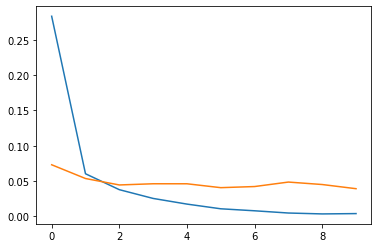

In [ ]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.02754717320203781, 0.991100013256073]


1/1 [==============================] - 0s 24ms/step
Giá trị dự đoán:  7
1/1 [==============================] - 0s 17ms/step
Giá trị dự đoán:  2
1/1 [==============================] - 0s 17ms/step
Giá trị dự đoán:  1
1/1 [==============================] - 0s 19ms/step
Giá trị dự đoán:  0
1/1 [==============================] - 0s 22ms/step
Giá trị dự đoán:  4
1/1 [==============================] - 0s 22ms/step
Giá trị dự đoán:  1
1/1 [==============================] - 0s 20ms/step
Giá trị dự đoán:  4
1/1 [==============================] - 0s 24ms/step
Giá trị dự đoán:  9
1/1 [==============================] - 0s 27ms/step
Giá trị dự đoán:  5
1/1 [==============================] - 0s 28ms/step
Giá trị dự đoán:  9


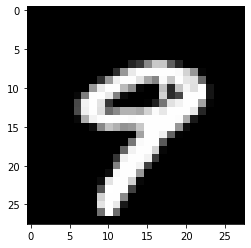

In [ ]:
# 10. Dự đoán ảnh
for i in range(0,10):
  plt.imshow(X_test[i].reshape(28,28), cmap='gray')
  y_predict = model.predict(X_test[i].reshape(1,28,28,1))
  print('Giá trị dự đoán: ', np.argmax(y_predict))